In [9]:
import random
import numpy as np
import operator, pandas as pd, matplotlib.pyplot as plt

In [10]:
class Data:
    # lay du lieu tu trong file
    def __init__(self, filename):
        lines = open(filename).read().split('\n')
        i = 0
        n = 1
        for line in lines:
            i = i + 1
            if i >= 7 and line != 'EOF' and line != '':
                type1 = [float(_) for _ in line.split()]
                map[n] = type1
                n = n + 1

In [11]:
class GA:
    def cmp(self, a, b):
        return (a > b) - (a < b)

    def distance(self, city1, city2):
        for i in map:
            if city1 == i:
                point1 = map[i]
            if city2 == i:
                point2 = map[i]
        distance = np.power(((point1[1] - point2[1]) ** 2 + (point1[2] - point2[2]) ** 2), 0.5)
        return distance

    def routeDistance(self, individual):
        # tinh tong duong di cua ca the
        distance = 0
        for n in range(1, len(individual) + 1):
            if n >= 1 and n < len(map):
                city1 = individual[n - 1]
                city2 = individual[n]
                distance = distance + self.distance(city1, city2)
            if n == len(map):
                city1 = individual[n - 1]
                city2 = individual[0]
                distance = distance + self.distance(city1, city2)
        return distance
    
    def check(self, route):
        # kiem tra co phan tu bi trung nhau hay khong
        check = 0
        for i in population:
            if self.cmp(population[i], route) == 0:
                check = check + 1
        return check

    def createRoute(self):
        # tao ca the
        self.root = list(map.keys())
        random.shuffle(self.root)
        return self.root

    def initialPopulation(self, popSize):
        # tao quan the
        i = 0
        while i < popSize:
            child = self.createRoute()
            check = self.check(child)
            if check == 0:
                population[i] = child
                popDistance[i] = self.routeDistance(population[i])
                i = i + 1
            if check != 0:
                i = i
        return 0

    def selection(self, eliteSize):
        # chon lua theo fitness = 1/distance, lua chon ngau nhien boi vong quay roullette
        # luu ti le phan tram tuong ung voi moi diem o percentFitness
        fitnessValue = 0
        percentFitness = {}
        for i in popDistance:
            fitness[i] = float(1 / popDistance[i])
            fitnessValue += float(1 / popDistance[i])
            percentFitness[i] = fitnessValue
        for m in fitness:
            percentFitness[m] = float(percentFitness[m] * 100) / fitnessValue
        eliteRoute = {}
        i = 0
        while i < eliteSize:
            rand = float(random.random() * 100)
            eliteRoute[i] = 1
            for n in percentFitness:
                if percentFitness[n] < rand <= percentFitness[n + 1]:
                    eliteRoute[i] = n
            check = 0
            for m in eliteRoute:
                if eliteRoute[m] == eliteRoute[i] and m != i:
                    check = 1
            if check == 0:
                i = i + 1
            if check != 0:
                i = i
        return eliteRoute

    def crossover(self, cutRange, eliteSize):
        # lai ghep bang phuong phap doi
        i = 0
        child = {}
        dulp = 0
        # lay phan chung cua parent 1 va parent 2, range [0, cutRange]
        while i < eliteSize:
            geneRange = []
            if i == eliteSize - 1:
                j = 0
            elif i != eliteSize - 1:
                j = i + 1
            eliteRoute = self.selection(eliteSize)
            for m in range(cutRange):
                geneRange.append(population[eliteRoute[i]][m - 1])
            child[i] = geneRange
            other = 0
            while other < len(map):
                for n in range(len(geneRange)):
                    if geneRange[n] == population[eliteRoute[j]][other]:
                        dulp = dulp + 1
                if dulp == 0:
                    child[i].append(population[eliteRoute[j]][other])
                else:
                    dulp = 0
                other = other + 1
            self.mutation(child[i], mutationRate)
            check = self.check(child[i])
            if check == 0:
                i = i + 1
            if check != 0:
                i = i
        return child

    def mutation(self, child, mutationRate):
        rand = float(random.randrange(0, 10000)) / 10000
        while rand <= mutationRate:
            print('Mutant!')
            swapped = 2
            swapWith = 5
            gene1 = child[swapped]
            gene2 = child[swapWith]
            child[swapped] = gene2
            child[swapWith] = gene1
            rand = float(random.randrange(0, 10000)) / 10000
        return child

    def evaluation(self, children, eliteSize, popSize):
        i = 0
        worstFitness = {}
        while i < eliteSize:
            worstFitness[i] = 0
            for j in range(popSize):
                out = 0
                if fitness[j] <= fitness[worstFitness[i]]:
                    for n in range(len(worstFitness)):
                        if j == worstFitness[n]:
                            out = 1
                    if out == 0:
                        worstFitness[i] = j
            i = i + 1
        i = 0
        while i < eliteSize:
            population[worstFitness[i]] = children[i]
            popDistance[worstFitness[i]] = self.routeDistance(children[i])
            i = i + 1
        return 0

    def bestIndividual(self):
        bestIndividual = {0: None, 1: None}
        bestDistance = 200000
        pos = 0
        for i in range(popSize):
            if popDistance[i] <= bestDistance:
                bestDistance = popDistance[i]
                pos = i
        bestIndividual[0] = population[pos]
        bestIndividual[1] = bestDistance
        return bestIndividual

File data: 
Generation 1 best distance:  22306.27310036966
Generation 2 best distance:  22306.27310036966
Generation 3 best distance:  22306.27310036966
Generation 4 best distance:  22306.27310036966
Generation 5 best distance:  22306.27310036966
Generation 6 best distance:  22306.27310036966
Generation 7 best distance:  20904.631821636463
Mutant!
Generation 8 best distance:  20278.277161197588
Generation 9 best distance:  20278.277161197588
Generation 10 best distance:  20045.57984058407
Generation 11 best distance:  19428.744480146022
Generation 12 best distance:  19428.744480146022
Generation 13 best distance:  19428.744480146022
Generation 14 best distance:  19428.744480146022
Generation 15 best distance:  19330.468884805956
Generation 16 best distance:  19262.668699309652
Generation 17 best distance:  19152.044772841557
Generation 18 best distance:  19152.044772841557
Generation 19 best distance:  17430.794429438643
Generation 20 best distance:  17430.794429438643
Generation 21 be

Generation 166 best distance:  10802.63467973513
Generation 167 best distance:  10802.63467973513
Generation 168 best distance:  10802.63467973513
Mutant!
Generation 169 best distance:  10792.5573370916
Generation 170 best distance:  10792.5573370916
Generation 171 best distance:  10792.5573370916
Generation 172 best distance:  10792.5573370916
Generation 173 best distance:  10792.5573370916
Generation 174 best distance:  10792.5573370916
Generation 175 best distance:  10741.62227745432
Generation 176 best distance:  10741.62227745432
Generation 177 best distance:  10741.62227745432
Mutant!
Generation 178 best distance:  10741.62227745432
Generation 179 best distance:  10741.62227745432
Generation 180 best distance:  10741.62227745432
Generation 181 best distance:  10741.62227745432
Generation 182 best distance:  10703.791291757665
Generation 183 best distance:  10703.791291757665
Generation 184 best distance:  10703.791291757665
Generation 185 best distance:  10703.791291757665
Genera

Generation 332 best distance:  9496.797400969988
Generation 333 best distance:  9496.797400969988
Generation 334 best distance:  9496.797400969988
Generation 335 best distance:  9496.797400969988
Generation 336 best distance:  9496.797400969988
Generation 337 best distance:  9496.797400969988
Generation 338 best distance:  9496.797400969988
Generation 339 best distance:  9496.797400969988
Generation 340 best distance:  9496.797400969988
Generation 341 best distance:  9496.797400969988
Generation 342 best distance:  9490.852132685399
Generation 343 best distance:  9476.611594222273
Generation 344 best distance:  9476.611594222273
Mutant!
Generation 345 best distance:  9476.611594222273
Generation 346 best distance:  9476.611594222273
Generation 347 best distance:  9476.611594222273
Generation 348 best distance:  9476.611594222273
Generation 349 best distance:  9476.611594222273
Generation 350 best distance:  9381.246098153397
Generation 351 best distance:  9381.246098153397
Generation 3

Generation 501 best distance:  7952.412528023576
Generation 502 best distance:  7952.412528023576
Generation 503 best distance:  7952.412528023576
Generation 504 best distance:  7952.412528023576
Generation 505 best distance:  7947.956296429218
Generation 506 best distance:  7947.956296429218
Generation 507 best distance:  7947.956296429218
Generation 508 best distance:  7947.956296429218
Generation 509 best distance:  7947.956296429218
Generation 510 best distance:  7947.956296429218
Mutant!
Generation 511 best distance:  7947.956296429218
Generation 512 best distance:  7947.956296429218
Generation 513 best distance:  7947.956296429218
Generation 514 best distance:  7947.956296429218
Generation 515 best distance:  7947.956296429218
Generation 516 best distance:  7947.956296429218
Mutant!
Generation 517 best distance:  7940.039028468037
Generation 518 best distance:  7940.039028468037
Generation 519 best distance:  7940.039028468037
Generation 520 best distance:  7940.039028468037
Gene

Generation 669 best distance:  7429.6578097205775
Generation 670 best distance:  7429.6578097205775
Generation 671 best distance:  7429.6578097205775
Generation 672 best distance:  7429.6578097205775
Generation 673 best distance:  7429.6578097205775
Generation 674 best distance:  7429.6578097205775
Generation 675 best distance:  7429.6578097205775
Generation 676 best distance:  7429.6578097205775
Generation 677 best distance:  7429.6578097205775
Generation 678 best distance:  7429.6578097205775
Generation 679 best distance:  7429.6578097205775
Generation 680 best distance:  7367.412371646659
Generation 681 best distance:  7367.412371646659
Generation 682 best distance:  7367.412371646659
Generation 683 best distance:  7367.412371646659
Generation 684 best distance:  7367.412371646659
Generation 685 best distance:  7367.412371646659
Generation 686 best distance:  7367.412371646659
Mutant!
Generation 687 best distance:  7367.412371646659
Generation 688 best distance:  7367.412371646659
G

Generation 835 best distance:  7328.179771321417
Generation 836 best distance:  7328.179771321417
Generation 837 best distance:  7328.179771321417
Generation 838 best distance:  7328.179771321417
Generation 839 best distance:  7328.179771321417
Generation 840 best distance:  7328.179771321417
Generation 841 best distance:  7328.179771321417
Generation 842 best distance:  7328.179771321417
Mutant!
Generation 843 best distance:  7328.179771321417
Generation 844 best distance:  7328.179771321417
Generation 845 best distance:  7328.179771321417
Mutant!
Generation 846 best distance:  7328.179771321417
Generation 847 best distance:  7328.179771321417
Generation 848 best distance:  7328.179771321417
Generation 849 best distance:  7328.179771321417
Generation 850 best distance:  7328.179771321417
Generation 851 best distance:  7328.179771321417
Generation 852 best distance:  7328.179771321417
Generation 853 best distance:  7328.179771321417
Generation 854 best distance:  7328.179771321417
Gene

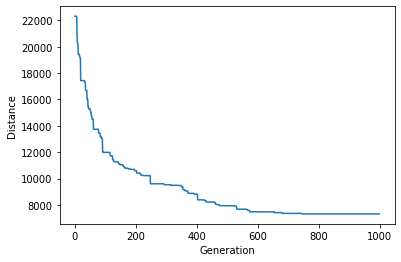

In [26]:
map = {}
population = {}  # danh sach quan the
popDistance = {}  # danh sach duong di cua moi ca the
fitness = {}
popSize = 100  # so ca the trong quan the
eliteSize = 50  # so ca the cha me duoc chon
time = 1000  # so the he
cutRange = 7  # diem gene cat lai ghep
mutationRate = 0.001
print("File data: ")
filename = "dj38.tsp"
a = Data(filename)

i = 1
test = GA()
test.initialPopulation(popSize)
BestDistance = test.routeDistance(population[1])
progress = []
while i <= time:
    test.evaluation(test.crossover(cutRange, eliteSize), eliteSize, popSize)
    print('Generation', i, 'best distance: ', test.routeDistance(test.bestIndividual()[0]))
    a = sorted(fitness.items(), key = operator.itemgetter(1), reverse = True)
    progress.append(1 / a[0][1])
    if BestDistance > test.bestIndividual()[1]:
        BestDistance = test.bestIndividual()[1]
        BestWay = test.bestIndividual()[0]
    i = i + 1
# print ('population:', population)
print('Best way:', BestWay)
print('Best distance:', test.routeDistance(BestWay))
print(popDistance)

plt.plot(progress)
plt.ylabel('Distance')
plt.xlabel('Generation')
plt.show()